In [552]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('data\wine_cleared.csv')
import statistics
data.shape

(129971, 13)

In [553]:
data['price_round'] = data['price'].round().astype(int)

In [554]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data['year']

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 129971, dtype: object

In [555]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [556]:
data['country'].value_counts()[:3]

US        54504
France    22093
Italy     19540
Name: country, dtype: int64

In [557]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
print(data['is_france'].sum())
print(data['is_italy'].sum())

22093
19540


In [558]:
data.shape

(129971, 18)

In [559]:
data['old_wine'] = data['year'].apply(lambda x: 1 if float(x) < 2010 else 0)
data['old_wine'].sum()

39781

In [560]:
data['locality'] = data['title'].str.findall('\((.*?)\)').str.get(0)
data['locality']

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: locality, Length: 129971, dtype: object

In [561]:
data.shape

(129971, 20)

In [562]:
country_population = pd.read_csv('data\country_population.csv', sep=';')
display(country_population[country_population['country'] == 'China'])
country_dupl = country_population.duplicated(subset='country')
country_population = country_population.drop_duplicates(subset='country')

,country,population
0,China,"1,411,778,724"
102,China,"7,394,700"


In [563]:
country_population[country_population['country'] == 'Italy']['population']

24    59,097,904
Name: population, dtype: object

In [564]:
data = data.join(country_population.set_index('country'), on='country')

In [565]:
data.shape

(129971, 21)

In [566]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013,0,0,1,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,Erben Müller-Burggraef,"83,129,285"
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Pinot Noir,Citation,75,2004,1,0,0,1,Oregon,"333,022,386"
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0,0,Alsace,"68,035,000"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0,0,Alsace,"68,035,000"


In [567]:
country_area = pd.read_csv('data\country_area.csv', sep=';')


In [568]:
# Задание 3.2
# 1 point possible (graded)
# Создайте новый признак area_country — площадь страны, аналогичный признаку population.

# Какая площадь страны у вина под названием 
# 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? 
# Ответ вводите без пробелов, округлите до целых.

data = data.join(country_area.set_index('country'), on='country')
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'][
    'area'
]

94    9372610.0
Name: area, dtype: float64

In [569]:
data.shape

(129971, 22)

client_id — идентификатор клиента в базе;
agent_date — время соединения с агентом;
created_at — время соединения с клиентом (начало разговора);
end_date — время окончания соединения с клиентом (конец разговора).

In [570]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [571]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [572]:
# Задание 4.1
# 1 point possible (graded)
# Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. 
# Результат запишите в новый признак time_connection.

# В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

In [573]:
# Задание 4.2
# 1 point possible (graded)
# Создайте новый признак is_connection — факт соединения с клиентом. 
# Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

# В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum()
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

In [574]:
# Задание 4.3
# 1 point possible (graded)
# Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.

# В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [575]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [576]:
# Задание 4.5
# 1 point possible (graded)
# Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. 
# За дату отсчёта возьмите 12 января 2022 года. 
# В ответ впишите максимальное количество дней с момента произведения вина. 
# Ответ округлите до целого числа.

# При попытке преобразовать созданный ранее столбец year в формат datetime, вы получите ошибку OutOfBoundsDatetime, 
# которая возникает из-за некорректного ожидаемого формата входных данных. 
# Чтобы справиться с этой ошибкой, воспользуйтесь параметром errors в функции to_datetime библиотеки Pandas. 
# Параметр нужно установить в значение coerce:
# data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
# Подробнее о назначении этого параметра вы можете прочесть в документации.
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
current_date = pd.to_datetime('2022-01-12')
data['years_diff'] = (current_date - data['year']).dt.days
data['years_diff'].max()


98627.0

In [577]:
import category_encoders as ce

In [578]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [579]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing['size'])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [580]:
ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, year_col], axis=1)

In [581]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,2013-01-01,0,0,0,0,Erben Müller-Burggraef,"83,129,285",357022.0,3298.0,1
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0,12
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0,3


In [582]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [583]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])

In [584]:
# Задание 5.4
# 1 point possible (graded)
# В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным.
# Закодируйте его, используя One-Hot Encoding.

# В ответе напишите, сколько признаков добавилось после применения кодирования.


encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
taster_name = encoder.fit_transform(data['taster_name'])
tasters = pd.concat([data, taster_name], axis=1)

print(tasters.shape[1] - data.shape[1])

20


In [585]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [586]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
countries = pd.concat([data, type_bin], axis=1)

print(countries.shape[1] - data.shape[1])
countries

6


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,population,area,years_diff,year,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,"59,097,904",301230.0,3298.0,1,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,"10,347,892",92391.0,4029.0,2,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,"333,022,386",9372610.0,3298.0,1,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,"333,022,386",9372610.0,3298.0,1,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,"333,022,386",9372610.0,3664.0,3,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,"83,129,285",357022.0,3298.0,1,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,"333,022,386",9372610.0,6586.0,12,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,"68,035,000",547030.0,3298.0,1,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,"68,035,000",547030.0,3664.0,3,0,0,0,1,0,1


In [587]:
data['taster_twitter_handle'].nunique()

16

In [588]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
taster_twitters = pd.concat([data, type_bin], axis=1)

print(taster_twitters.shape[1] - data.shape[1])


5


In [589]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [590]:
encoder = ce.OneHotEncoder(use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df)
df = pd.concat([df, type_bin], axis=1)

df

,product,price,payment_type,product_Product1,product_Product2,product_Product3,price,payment_type_Mastercard,payment_type_Visa,payment_type_Amex
0,Product1,1200,Mastercard,1,0,0,1200,1,0,0
1,Product2,3600,Visa,0,1,0,3600,0,1,0
2,Product3,7500,Amex,0,0,1,7500,0,0,1


In [591]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

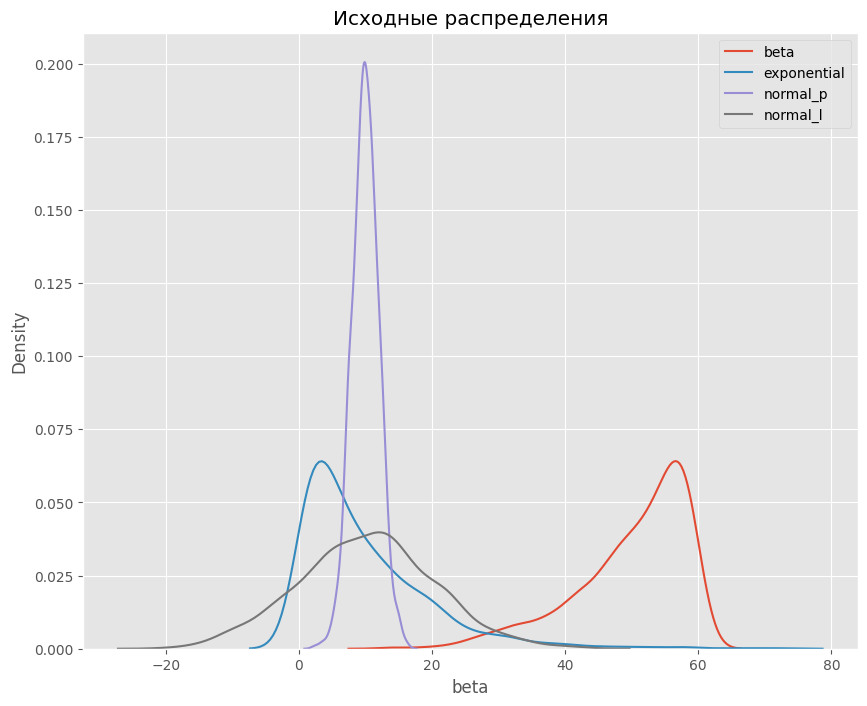

In [592]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [593]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<AxesSubplot: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

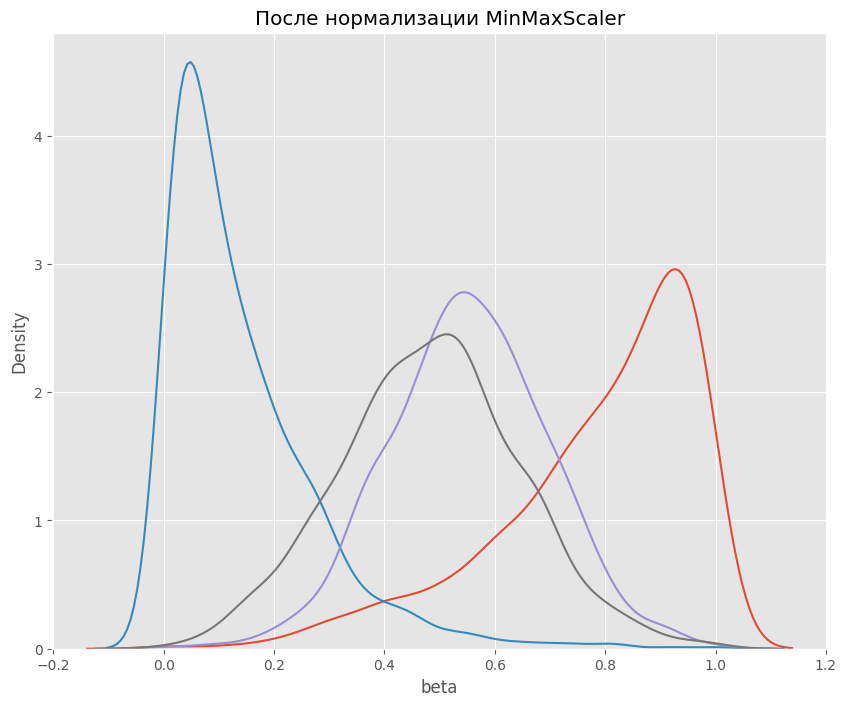

In [594]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<AxesSubplot: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

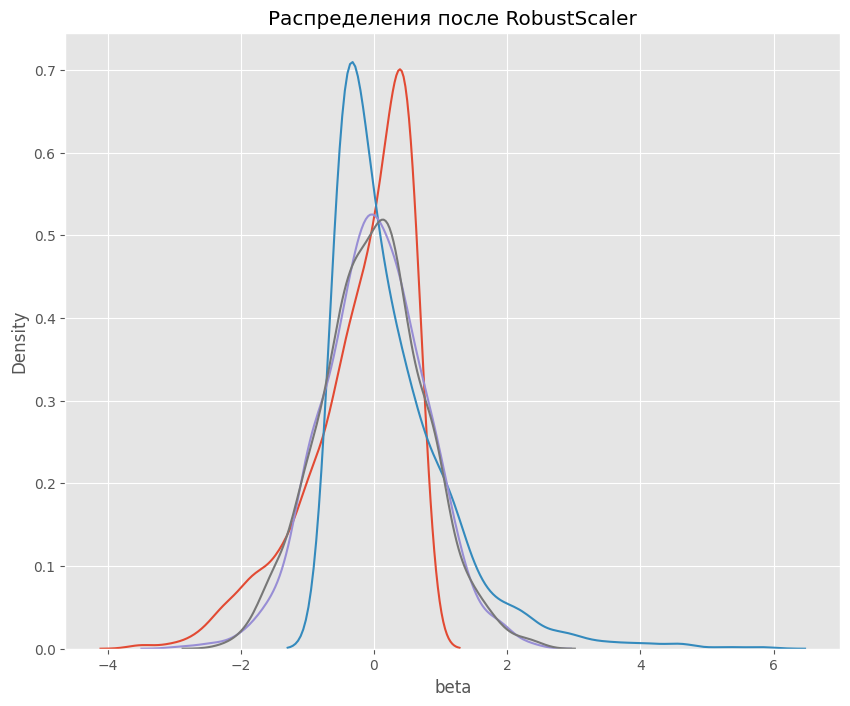

In [595]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)


<AxesSubplot: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

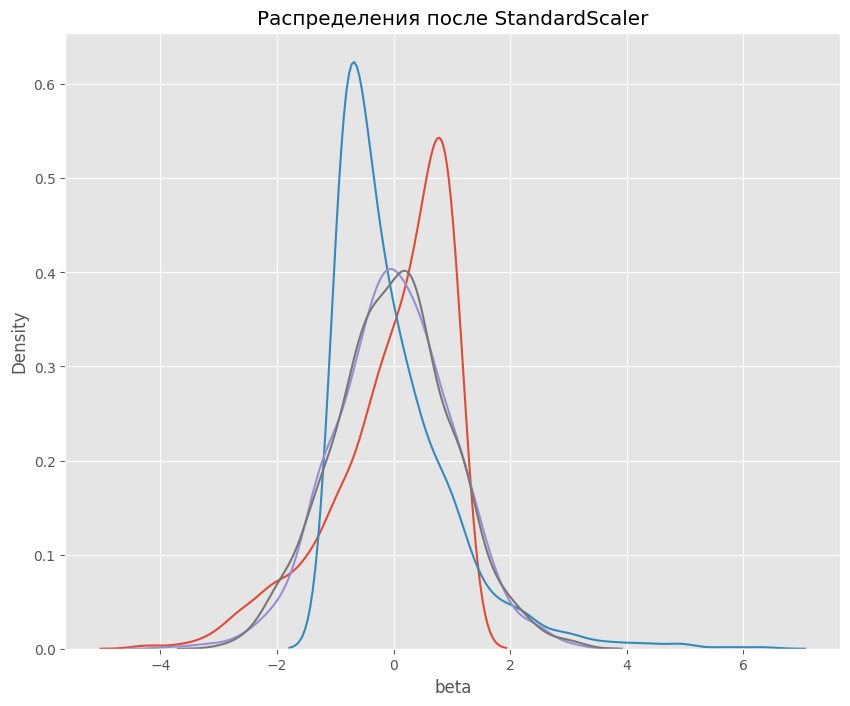

In [596]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [597]:
# Задание 6.4
# 1 point possible (graded)
# Нормализуйте признак price. 
# Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

# В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

to_norm_price = data['price']

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
to_norm_price = pd.DataFrame(to_norm_price, columns=['price'])
to_norm_price
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
norm_price = r_scaler.fit_transform(to_norm_price)
norm_price = pd.DataFrame(norm_price, columns=['price'])
print(round(norm_price['price'].sum()))

43501


In [598]:
# Задание 6.5
# 1 point possible (graded)
# Стандартизируйте исходный признак price.

# В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

to_std_price = data['price']

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
to_std_price = pd.DataFrame(to_std_price, columns=['price'])

# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
to_std_price = s_scaler.fit_transform(to_std_price)

to_std_price = pd.DataFrame(to_std_price, columns=['price'])

to_std_price['price'][129969]


-0.08498361311655961

In [599]:
r_scaler = preprocessing.StandardScaler()


df_r = r_scaler.fit_transform(data[['price', 'points']])
df_r = pd.DataFrame(df_r, columns=['price', 'points'])


round(df_r['price'][129968], 2)

-0.14

sepal length — длина наружной доли околоцветника;  
sepal width — ширина наружной доли околоцветника;  
petal length — длина внутренней доли околоцветника;  
petal width — ширина внутренней доли околоцветника.

In [600]:
iris = pd.read_csv('data\iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


C:\Users\u1\AppData\Local\Temp\ipykernel_25216\1094387807.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов


<AxesSubplot: >

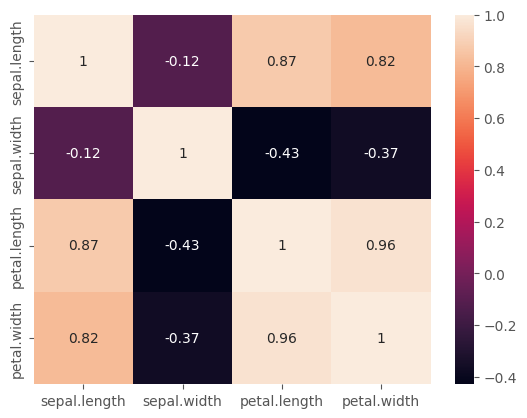

In [601]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [602]:
iris = iris.drop(['petal.width'], axis=1)

In [603]:
iris = iris.drop(['petal.length'], axis=1)

C:\Users\u1\AppData\Local\Temp\ipykernel_25216\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

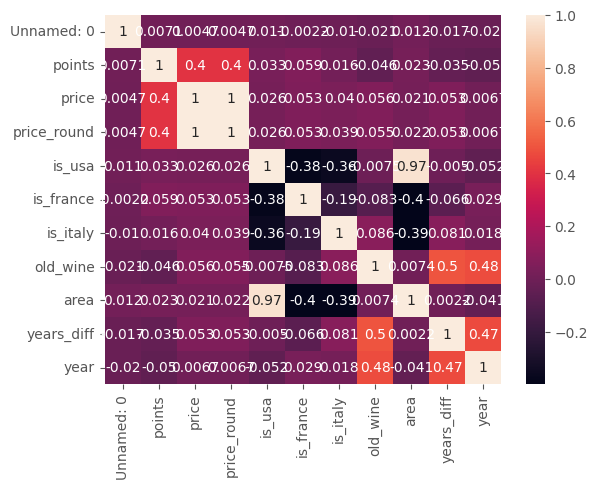

In [604]:
sns.heatmap(data.corr(), annot=True)

C:\Users\u1\AppData\Local\Temp\ipykernel_25216\1984179517.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)


<AxesSubplot: >

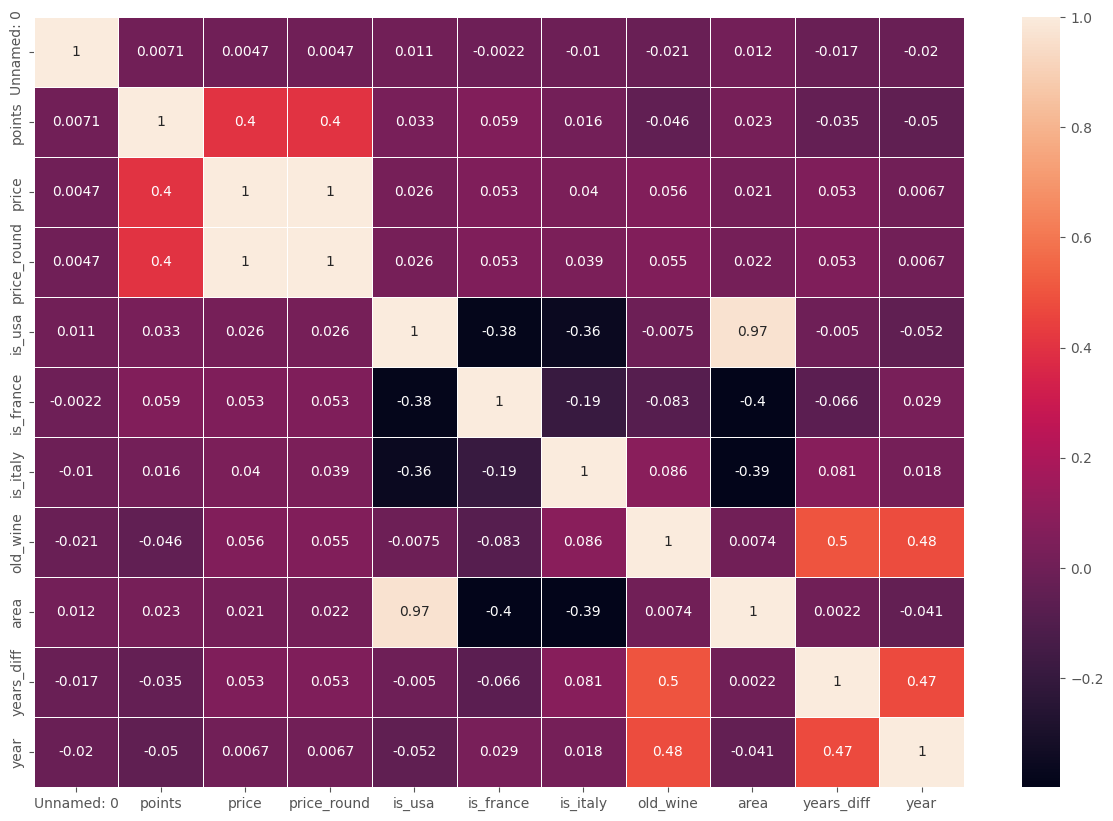

In [605]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)



C:\Users\u1\AppData\Local\Temp\ipykernel_25216\3884935027.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)


<AxesSubplot: >

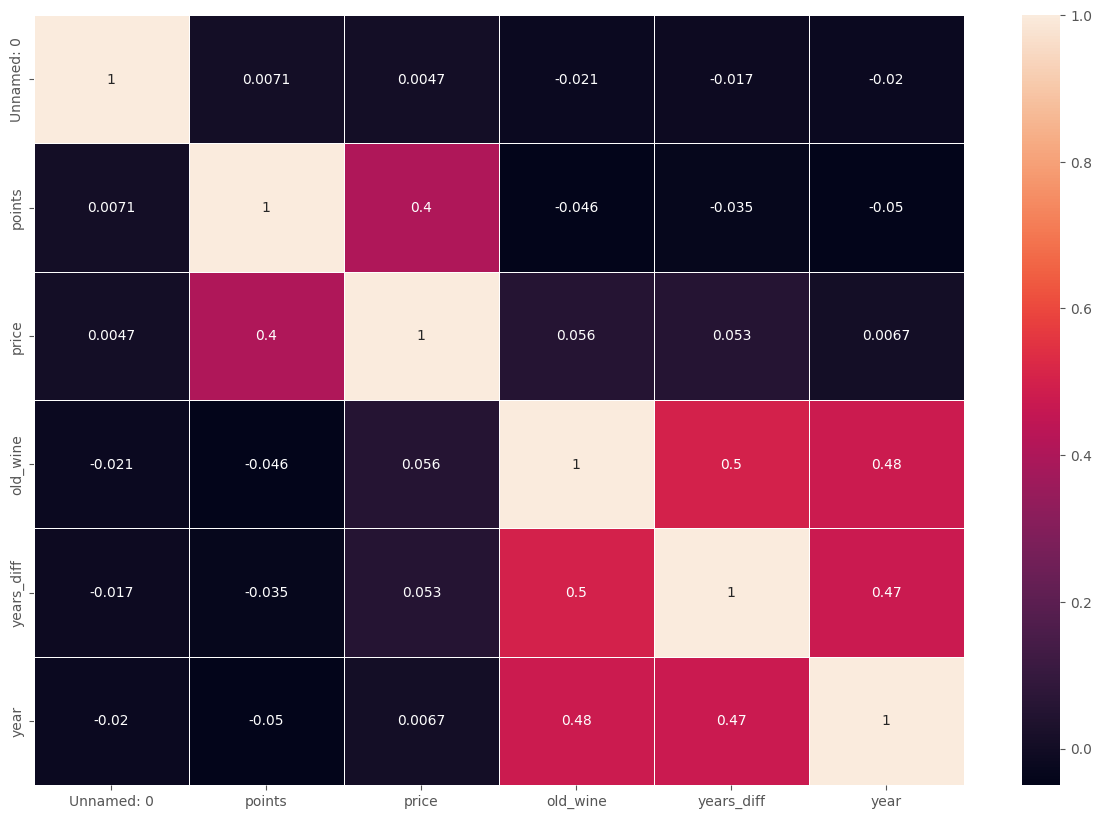

In [609]:
# Удалим самые сильно скоррелированные пары
# data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

Датасет содержит следующие признаки:

age — возраст  
sex — пол (1 - мужчина, 0 - женщина)  
cp — тип боли в груди (4 значения)  
trestbps — артериальное давление в покое  
chol — холестерин сыворотки в мг/дл  
fbs — уровень сахара в крови натощак > 120 мг/дл  
restecg — результаты электрокардиографии в покое (значения 0,1,2)  
thalach — достигнута максимальная частота сердечных сокращений  
exang — стенокардия, вызванная физической нагрузкой  
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя  
slope — наклон пикового сегмента ST при нагрузке  
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии  
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [706]:
heart = pd.read_csv('data\heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [707]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()


79

In [724]:
# def to_trestbps_mean_male(x):
#     if x <= 20:
#         return 123
#     if x >= 21 and x <= 30:
#         return 126
#     if x >= 31 and x <= 40:
#         return 129
#     if x >= 41 and x <= 50:
#         return 135
#     if x >= 51 and x <= 60:
#         return 142
#     if x >= 61:
#         return 142
# def to_trestbps_mean_female(x):
#     if x <= 20:
#         return 116
#     if x >= 21 and x <= 30:
#         return 120
#     if x >= 31 and x <= 40:
#         return 127
#     if x >= 41 and x <= 50:
#         return 137
#     if x >= 51 and x <= 60:
#         return 144
#     if x >= 61:
#         return 159
# heart['trestbps_mean'] = heart[heart['sex'] == 1]['age'].apply(to_trestbps_mean_male)  
# heart['trestbps_mean'] = heart[heart['sex'] == 0]['age'].apply(to_trestbps_mean_female) 
# heart['trestbps_mean'][300]

def get_trestbps_mean(sex, age):
    tab_trestbps = [[116, 120, 127, 137, 144, 159], [123, 126, 129, 135, 142, 142]]
    if age < 21:
        return tab_trestbps[int(sex)][0]
    elif age >= 61:
        return tab_trestbps[int(sex)][5]
    else:
        return tab_trestbps[int(sex)][int((age-1) // 10 - 1)]

heart['trestbps_mean'] = heart.apply(lambda row: get_trestbps_mean(row['sex'], row['age']), axis=1)
heart['trestbps_mean'][300]

142

In [725]:
heart.nunique()

age               41
sex                2
cp                 4
trestbps          49
chol             152
fbs                2
restecg            3
thalach           91
exang              2
oldpeak           40
slope              3
ca                 5
thal               4
target             2
old                2
trestbps_mean      8
dtype: int64

In [736]:
# heart_copy = heart.copy()
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'], use_cat_names=True) 

# указываем столбцы для кодирования
cat_name = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, cat_name], axis=1)
heart.shape

(303, 35)

In [737]:
# Задание 8.6
# 1 point possible (graded)
# Нормализуйте все числовые признаки подходящим способом.

# В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.
cols_names = list(heart.columns)

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
norm_heart = r_scaler.fit_transform(heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart = pd.DataFrame(norm_heart, columns=cols_names)
round(heart['chol'].std(),6)

0.816232

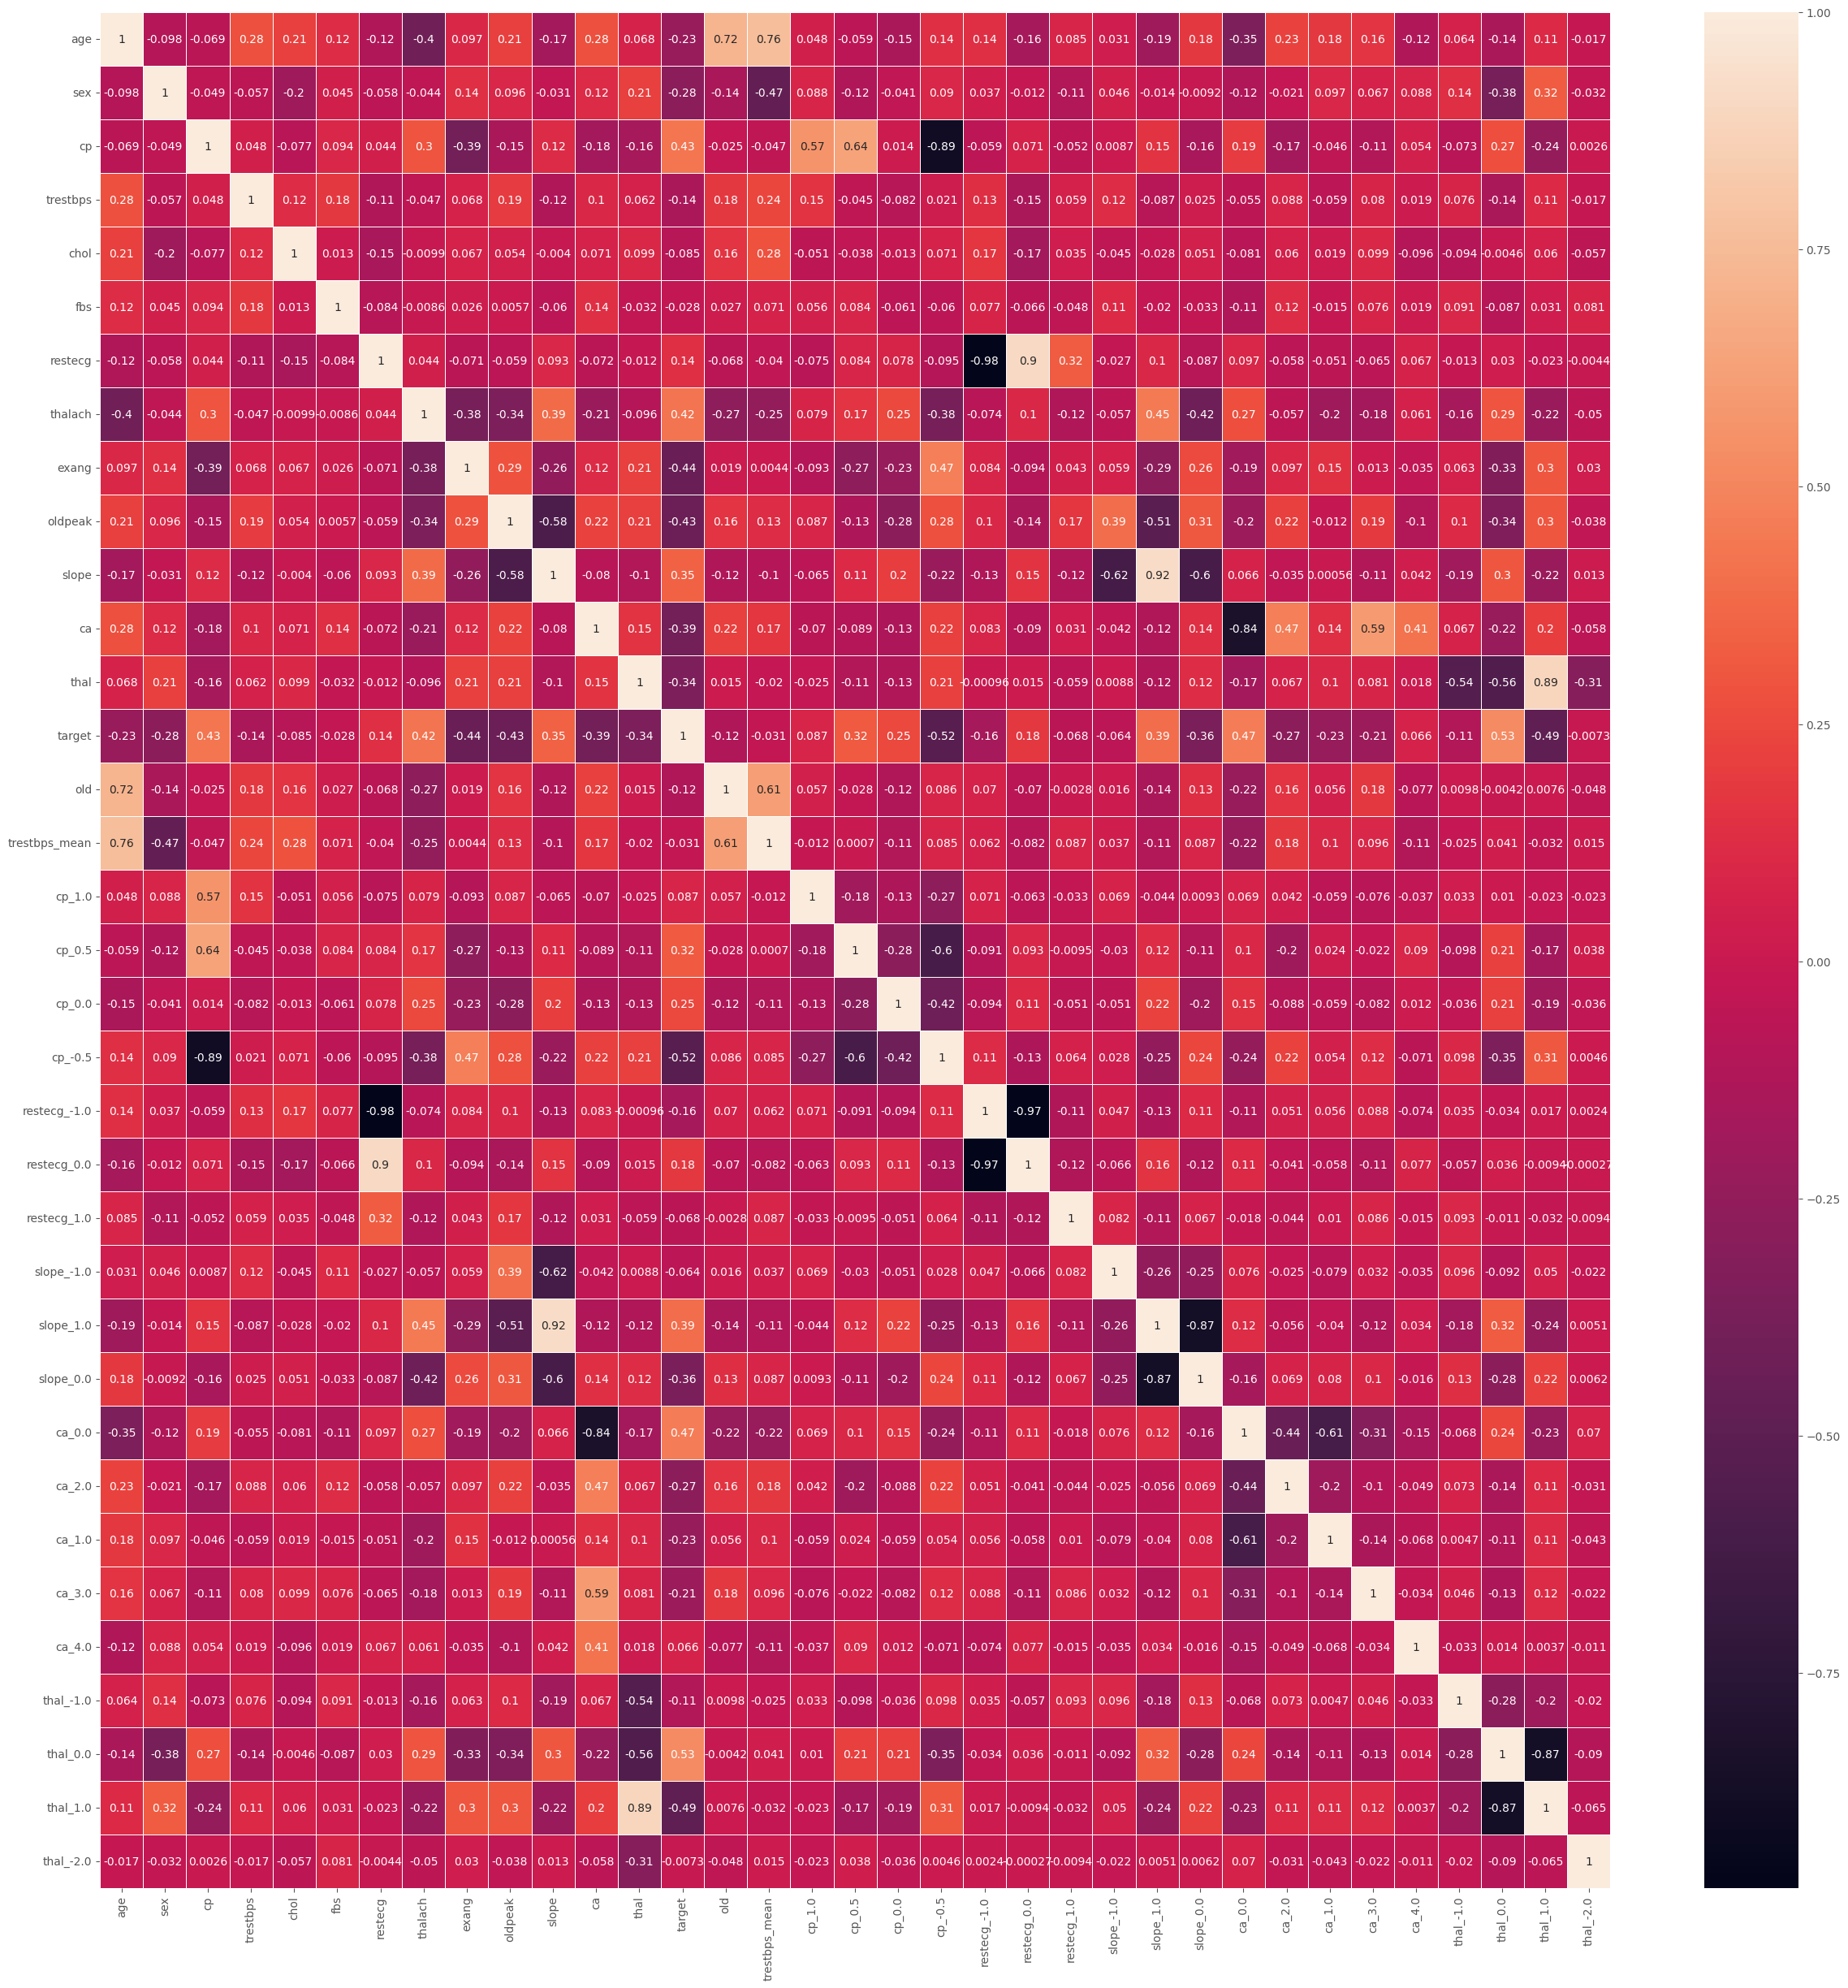

In [747]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(heart.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()